# Exploring data

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


## Fixing data

In [25]:
!ls ../../data

clean_kc_house_data.csv
column_names.md
kc_house_data.csv


In [26]:
data = pd.read_csv('../../data/clean_kc_house_data.csv')

In [27]:
data = data.drop(columns='Unnamed: 0')

In [28]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,2015-04-22,300000.0,6,3.00,2400,9373,2.0,Average,7 Average,2400,0.0,1991,98002,47.3262,-122.214,2060,7316
1,1200019,2014-05-08,647500.0,4,1.75,2060,26036,1.0,Good,8 Good,1160,900.0,1947,98166,47.4444,-122.351,2590,21891
2,1200021,2014-08-11,400000.0,3,1.00,1460,43000,1.0,Average,7 Average,1460,0.0,1952,98166,47.4434,-122.347,2250,20023
3,2800031,2015-04-01,235000.0,3,1.00,1430,7599,1.5,Good,6 Low Average,1010,420.0,1930,98168,47.4783,-122.265,1290,10320
4,3600057,2015-03-19,402500.0,4,2.00,1650,3504,1.0,Average,7 Average,760,890.0,1951,98144,47.5803,-122.294,1480,3504


In [29]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

In [30]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,2015-04-22,300000.0,6,3.00,2400,9373,2.0,Average,7 Average,2400,0.0,1991,98002,47.3262,-122.214,2060,7316
1,1200019,2014-05-08,647500.0,4,1.75,2060,26036,1.0,Good,8 Good,1160,900.0,1947,98166,47.4444,-122.351,2590,21891
2,1200021,2014-08-11,400000.0,3,1.00,1460,43000,1.0,Average,7 Average,1460,0.0,1952,98166,47.4434,-122.347,2250,20023
3,2800031,2015-04-01,235000.0,3,1.00,1430,7599,1.5,Good,6 Low Average,1010,420.0,1930,98168,47.4783,-122.265,1290,10320
4,3600057,2015-03-19,402500.0,4,2.00,1650,3504,1.0,Average,7 Average,760,890.0,1951,98144,47.5803,-122.294,1480,3504


# Target: Predicting sale price

## Simple model

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20970 entries, 0 to 20969
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             20970 non-null  int64         
 1   date           20970 non-null  datetime64[ns]
 2   price          20970 non-null  float64       
 3   bedrooms       20970 non-null  int64         
 4   bathrooms      20970 non-null  float64       
 5   sqft_living    20970 non-null  int64         
 6   sqft_lot       20970 non-null  int64         
 7   floors         20970 non-null  float64       
 8   condition      20970 non-null  object        
 9   grade          20970 non-null  object        
 10  sqft_above     20970 non-null  int64         
 11  sqft_basement  20970 non-null  float64       
 12  yr_built       20970 non-null  int64         
 13  zipcode        20970 non-null  int64         
 14  lat            20970 non-null  float64       
 15  long           2097

<AxesSubplot:>

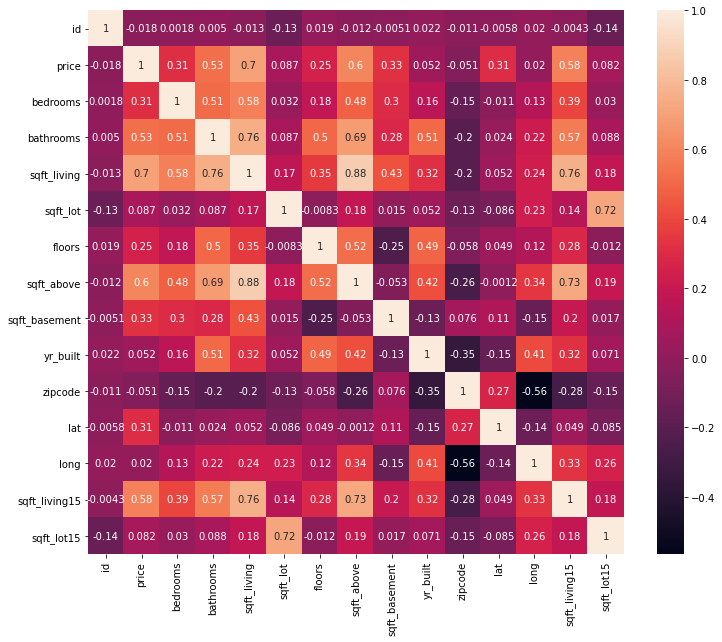

In [37]:
plt.subplots(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True)

In [41]:
X = data['sqft_living']
y = data['price']

In [42]:
simple_model = sm.OLS(y, sm.add_constant(X)).fit()
simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 2.033e+04
Date:                Mon, 27 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:38:07   Log-Likelihood:            -2.9141e+05
No. Observations:               20970   AIC:                         5.828e+05
Df Residuals:                   20968   BIC:                         5.828e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.359e+04   4489.339     -9.710      0.000   -5.24e+04   -3.48e+04
sqft_living   281.0601      1.971    142.586      0.000     277.197     284.924
==============================================================================
Omnibus:                    14429.476   Durbin-Watson:                   1.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           534860.122
Skew:                           2.833   Prob(JB):                         0.00
Kurtosis:                      27.084   Cond. No.                     5.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
#multiple linear regression, kitchen-sink model
X_mult = data.drop(columns=['id', 'zipcode', 'lat', 'long', 'date', 'condition', 'grade', 'price'])
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X_mult, y, test_size=0.33, random_state=42)

In [70]:
X_mult.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,6,3.00,2400,9373,2.0,2400,0.0,1991,2060,7316
1,4,1.75,2060,26036,1.0,1160,900.0,1947,2590,21891


In [78]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
lr = LinearRegression()

lr.fit(X_train_scaled, y_train)

train_pred = lr.predict(X_train_scaled) 
test_pred = lr.predict(X_test_scaled)

In [80]:
print(f"Train R2 Score: {r2_score(y_train, train_pred):.4f}")
print(f"Train RMSE Score: {mean_squared_error(y_train, train_pred, squared=False):.4f}")
print("*"*20)
print(f"Test R2 Score: {r2_score(y_test, test_pred):.4f}")
print(f"Test RMSE Score: {mean_squared_error(y_test, test_pred, squared=False):.4f}")

Train R2 Score: 0.5743
Train RMSE Score: 240523.3079
********************
Test R2 Score: 0.5573
Test RMSE Score: 244450.4204


In [81]:
lr.coef_

array([ -69553.30108045,   53486.5449481 ,  123459.10100615,
         -1629.0061298 ,   31633.0452346 ,  103630.98732247,
         61397.75958285, -105497.78174248,   61016.15883158,
        -16962.70489288])

In [89]:
# Look at the coefs from our sklearn model
dict(zip(X_mult.keys(), lr.coef_))

{'bedrooms': -69553.30108045258,
 'bathrooms': 53486.544948102724,
 'sqft_living': 123459.10100614601,
 'sqft_lot': -1629.0061298032674,
 'floors': 31633.045234600406,
 'sqft_above': 103630.9873224662,
 'sqft_basement': 61397.759582845705,
 'yr_built': -105497.78174248211,
 'sqft_living15': 61016.158831577,
 'sqft_lot15': -16962.70489288345}